# **데이터 불러오기**

In [1]:
import pickle

with open('/content/drive/MyDrive/dm_data/df_dog.pickle', 'rb') as file1:
    df_dog = pickle.load(file1)
with open('/content/drive/MyDrive/dm_data/df_cat.pickle', 'rb') as file2:
    df_cat = pickle.load(file2)

In [2]:
import pandas as pd

animal_df = pd.concat([df_dog, df_cat], ignore_index=True)

animal_df = animal_df.drop(columns='rescueDate')

animal_df.head()

,adoptionStatusCd,age,classification,gender,hitCnt,memo,species,weight
0,1,2년령(추정),1,4,152,"중성수 추정, 마름, 홍역음성, 파보음성, 코로나음성",푸들,3.2kg(추정)
1,1,4년령(추정),1,2,93,"치석, 겁많음, 홍역음성, 파보음성, 코로나음성",스피츠 믹스,6.6kg
2,1,2.5개월령(추정),1,2,92,"홍역음성, 파보음성, 코로나음성",믹스,2.6kg
3,7,5년령(추정),1,2,8,"경계심, 반환예정",믹스,14kg(추정)
4,7,8개월령(추정),1,2,192,"동시구조, 옷착용, 홍역음성, 파보음성, 코로나음성, 반환예정",페키니즈,3.4kg


# **나이 실수로 변환**

In [3]:
animal_df['age'].unique()

array(['2년령(추정)', '4년령(추정)', '2.5개월령(추정)', '5년령(추정)', '8개월령(추정)',
       '12년령(추정)', '8년령(추정)', '3개월령(추정)', '13년령(추정)', '4주령(추정)',
       '1년령(추정)', '3년령(추정)', '10년령(추정)', '2개월령(추정)', '9년령(추정)', '6년령(추정)',
       '7년령(추정)', '14년령(추정)', '2017(년생)', '7일령(추정)', '1.5개월령(추정)',
       '2009(년생)', '2021(년생)', '15년령(추정)', '9개월령(추정)', '10개월령(추정)',
       '5개월령(추정)', '4개월령(추정)', '6개월령(추정)', '2020(년생)', '2022(년생)',
       '2004(년생)', '2018(년생)', '11년령(추정)', '1개월령(추정)', '7개월령(추정)',
       '17년령(추정)', '미상', '6년령(추저)', '5일령(추정)', '2019(년생)', '4 년령(추정)',
       '3 년령(추정)', '2015(년생)', '2014(년생)', '4일령(추정)', '1.5년령(추정)',
       '2.5년령(추정)', '16년령(추정)', '2023(년생)', '2016(년생)', '2024(년생)',
       '10개월령', '3주령(추정)', '8개월령령(추정)', '4령(추정)', '3일령(추정)', '18일령(추정)',
       '2개월령', '20년령(추정)', '6주령(추정)', '8년령', '5주령(추정)', '2012(년생)',
       '20일령(추정)', '19년령(추정)', '40일령(추정)', '45일령(추정)', '50일령(추정)',
       '2006(년생)', '1년형(추정)', '2013(년생)', '30일령(추정)', '25일령(추정)',
       '2023(60일미만)(년생)', '2011(년생)', '85개월령(

In [4]:
import re

def convert_age_to_float(age_str):

    ''' 나이를 년수(실수)로 변환하는 함수 '''

    if "년생" in age_str:
        match = re.search(r'(\d+)(?=\(년생\))', age_str)
        if match:
            birth_year = int(match.group(0))
            return 2024 - birth_year
    elif "년령" in age_str:
        match = re.search(r'([\d.]+)(?=년령)', age_str)
        if match:
            return float(match.group(0))
    elif "개월령" in age_str:
        match = re.search(r'([\d.]+)(?=개월령)', age_str)
        if match:
            return float(match.group(0)) / 12
    elif "일령" in age_str:
        match = re.search(r'([\d.]+)(?=일령)', age_str)
        if match:
            return float(match.group(0)) / 365
    elif "주령" in age_str:
        match = re.search(r'([\d.]+)(?=주령)', age_str)
        if match:
            return float(match.group(0)) / 52
    return None

animal_df['age'] = animal_df['age'].apply(convert_age_to_float)
animal_df        = animal_df[animal_df['age'] != '미상']         # 없는 데이터는 삭제
animal_df

,adoptionStatusCd,age,classification,gender,hitCnt,memo,species,weight
0,1,2.000000,1,4,152,"중성수 추정, 마름, 홍역음성, 파보음성, 코로나음성",푸들,3.2kg(추정)
1,1,4.000000,1,2,93,"치석, 겁많음, 홍역음성, 파보음성, 코로나음성",스피츠 믹스,6.6kg
2,1,0.208333,1,2,92,"홍역음성, 파보음성, 코로나음성",믹스,2.6kg
3,7,5.000000,1,2,8,"경계심, 반환예정",믹스,14kg(추정)
4,7,0.666667,1,2,192,"동시구조, 옷착용, 홍역음성, 파보음성, 코로나음성, 반환예정",페키니즈,3.4kg
...,...,...,...,...,...,...,...,...
3259,6,1.000000,2,4,10064,"수컷(중성화수술 O추정), 교통사고추정, 후지파행-좌측 경골비골 완전골절, 우측후지...",코리안숏헤어,3.7kg
3260,10,2.000000,2,1,2947,"중성암(TNR개체), 좌측귀잘림, 교통사고, 외부동물병원진료, 우안돌출-환납불가, ...",코리안숏헤어,4.3kg
3261,10,0.500000,2,2,1138,"중성화 수(3/23), 교통사고, 기력저하, 심한탈수, 양안 제3안검돌출, 심하게 ...",코리안숏헤어,1.89kg
3262,10,3.000000,2,1,1479,"중성 암(2/15), 교통사고, 후지파행, 경계심, 골반골절, 혈뇨, 심한구내염, ...",코리안숏헤어,3.2kg


# **성별 새로고침**


*   홀수면 암컷
*   짝수면 수컷

In [5]:
animal_df['gender'] = animal_df['gender'].apply(lambda x: 1 if int(x) % 2 != 0 else 2)
animal_df

,adoptionStatusCd,age,classification,gender,hitCnt,memo,species,weight
0,1,2.000000,1,2,152,"중성수 추정, 마름, 홍역음성, 파보음성, 코로나음성",푸들,3.2kg(추정)
1,1,4.000000,1,2,93,"치석, 겁많음, 홍역음성, 파보음성, 코로나음성",스피츠 믹스,6.6kg
2,1,0.208333,1,2,92,"홍역음성, 파보음성, 코로나음성",믹스,2.6kg
3,7,5.000000,1,2,8,"경계심, 반환예정",믹스,14kg(추정)
4,7,0.666667,1,2,192,"동시구조, 옷착용, 홍역음성, 파보음성, 코로나음성, 반환예정",페키니즈,3.4kg
...,...,...,...,...,...,...,...,...
3259,6,1.000000,2,2,10064,"수컷(중성화수술 O추정), 교통사고추정, 후지파행-좌측 경골비골 완전골절, 우측후지...",코리안숏헤어,3.7kg
3260,10,2.000000,2,1,2947,"중성암(TNR개체), 좌측귀잘림, 교통사고, 외부동물병원진료, 우안돌출-환납불가, ...",코리안숏헤어,4.3kg
3261,10,0.500000,2,2,1138,"중성화 수(3/23), 교통사고, 기력저하, 심한탈수, 양안 제3안검돌출, 심하게 ...",코리안숏헤어,1.89kg
3262,10,3.000000,2,1,1479,"중성 암(2/15), 교통사고, 후지파행, 경계심, 골반골절, 혈뇨, 심한구내염, ...",코리안숏헤어,3.2kg


## **성별 분포 막대그래프**

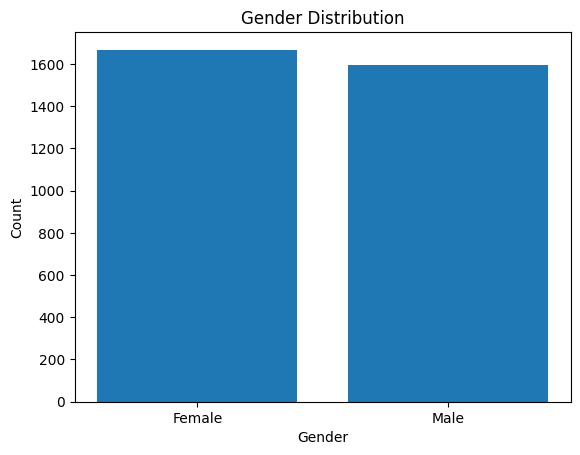

In [6]:
import matplotlib.pyplot as plt

gender_counts = animal_df['gender'].value_counts()

plt.bar(gender_counts.index, gender_counts.values)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')

plt.xticks([1, 2], ['Female', 'Male'])

plt.show()    # 괜찮은 분포

# **입양 상태에 따른 분류**


*   adoptionStatusCd == 4 if adopted
*   adoptionStatusCd == 7 if returned to Family

## 주인 반환된 것은 모두 제거, 입양된 것(1)과 안된 것(0)으로 데이터 수정



In [7]:
animal_df                     = animal_df[animal_df['adoptionStatusCd'] != '7']
animal_df['adoptionStatusCd'] = animal_df['adoptionStatusCd'].apply(lambda x: 1 if int(x) == 4 else 2)

animal_df

<ipython-input-7-0c6629a2b11e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  animal_df['adoptionStatusCd'] = animal_df['adoptionStatusCd'].apply(lambda x: 1 if int(x) == 4 else 2)


,adoptionStatusCd,age,classification,gender,hitCnt,memo,species,weight
0,2,2.000000,1,2,152,"중성수 추정, 마름, 홍역음성, 파보음성, 코로나음성",푸들,3.2kg(추정)
1,2,4.000000,1,2,93,"치석, 겁많음, 홍역음성, 파보음성, 코로나음성",스피츠 믹스,6.6kg
2,2,0.208333,1,2,92,"홍역음성, 파보음성, 코로나음성",믹스,2.6kg
6,2,8.000000,1,2,262,"목줄착용, 안구백탁, 치석, 홍역음성, 파보음성, 코로나음성",리트리버,31.6kg
7,2,2.000000,1,1,136,"동시구조, 목줄착용, 치석약간, 겁많음, 마름, 홍역음성, 파보음성, 코로나음성",믹스,10kg
...,...,...,...,...,...,...,...,...
3259,2,1.000000,2,2,10064,"수컷(중성화수술 O추정), 교통사고추정, 후지파행-좌측 경골비골 완전골절, 우측후지...",코리안숏헤어,3.7kg
3260,2,2.000000,2,1,2947,"중성암(TNR개체), 좌측귀잘림, 교통사고, 외부동물병원진료, 우안돌출-환납불가, ...",코리안숏헤어,4.3kg
3261,2,0.500000,2,2,1138,"중성화 수(3/23), 교통사고, 기력저하, 심한탈수, 양안 제3안검돌출, 심하게 ...",코리안숏헤어,1.89kg
3262,2,3.000000,2,1,1479,"중성 암(2/15), 교통사고, 후지파행, 경계심, 골반골절, 혈뇨, 심한구내염, ...",코리안숏헤어,3.2kg


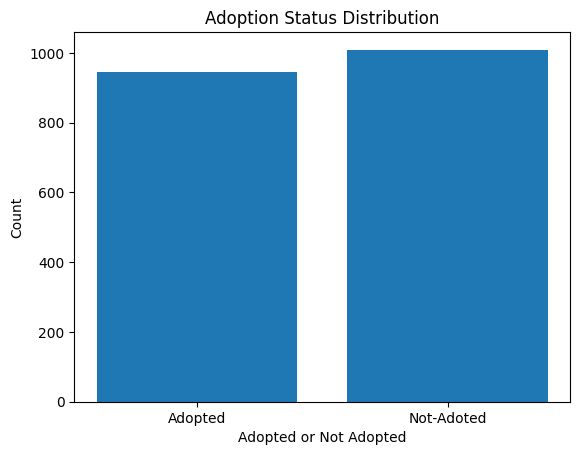

In [8]:
adptstat_counts = animal_df['adoptionStatusCd'].value_counts()

plt.bar(adptstat_counts.index, adptstat_counts.values)
plt.xlabel('Adopted or Not Adopted')
plt.ylabel('Count')
plt.title('Adoption Status Distribution')

plt.xticks([1, 2], ['Adopted', 'Not-Adoted'])

plt.show()            # 괜찮은 분포

# **몸무게 실수값으로 변경**

In [9]:
animal_df['weight'] = animal_df['weight'].replace(to_replace=r'[^\d.]+', value='', regex=True).astype(float)

animal_df

<ipython-input-9-15d161bbef21>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  animal_df['weight'] = animal_df['weight'].replace(to_replace=r'[^\d.]+', value='', regex=True).astype(float)


,adoptionStatusCd,age,classification,gender,hitCnt,memo,species,weight
0,2,2.000000,1,2,152,"중성수 추정, 마름, 홍역음성, 파보음성, 코로나음성",푸들,3.20
1,2,4.000000,1,2,93,"치석, 겁많음, 홍역음성, 파보음성, 코로나음성",스피츠 믹스,6.60
2,2,0.208333,1,2,92,"홍역음성, 파보음성, 코로나음성",믹스,2.60
6,2,8.000000,1,2,262,"목줄착용, 안구백탁, 치석, 홍역음성, 파보음성, 코로나음성",리트리버,31.60
7,2,2.000000,1,1,136,"동시구조, 목줄착용, 치석약간, 겁많음, 마름, 홍역음성, 파보음성, 코로나음성",믹스,10.00
...,...,...,...,...,...,...,...,...
3259,2,1.000000,2,2,10064,"수컷(중성화수술 O추정), 교통사고추정, 후지파행-좌측 경골비골 완전골절, 우측후지...",코리안숏헤어,3.70
3260,2,2.000000,2,1,2947,"중성암(TNR개체), 좌측귀잘림, 교통사고, 외부동물병원진료, 우안돌출-환납불가, ...",코리안숏헤어,4.30
3261,2,0.500000,2,2,1138,"중성화 수(3/23), 교통사고, 기력저하, 심한탈수, 양안 제3안검돌출, 심하게 ...",코리안숏헤어,1.89
3262,2,3.000000,2,1,1479,"중성 암(2/15), 교통사고, 후지파행, 경계심, 골반골절, 혈뇨, 심한구내염, ...",코리안숏헤어,3.20


# **종(species)에 대한 분류**

In [10]:
animal_df['species'].unique()

array(['푸들', '스피츠 믹스', '믹스', '리트리버', '진도', '포메라이언', '요크셔테리어', '닥스훈트 믹스',
       '말티즈', '비숑프리제', '보더콜리', '페키니즈', '웰시코기', '보더콜리 믹스', '포메라이언 믹스',
       '리트리버 믹스', '달마시안', '허스키', '코리안숏헤어', '마리노이즈', '말티즈 믹스', '치와와', '시츄',
       '동경견', '닥스훈트', '치와와 믹스', '시바', '스피츠', '미니핀', '푸들 믹스', '프렌치불독',
       '불개', '퍼그', '진도 믹스', '슈나우져', '풍산', '황색', '스탠다드푸들', '울프독',
       '비숑프리제 믹스', '비글', '코카스파니엘', '시츄 믹스', '슈나우저', '불독', '킹찰스스파니엘',
       '이탈리안그레이하운드', '아메리칸불리', '웰시코기 믹스', '셔틀랜드쉽독', '케인크로소', '세퍼드', '도사',
       '그레이트덴', '치와와믹스', '앙고라', '스코티쉬폴드', '앙고라 믹스', '스코티쉬폴드 믹스',
       '페르시안 믹스', '아메리칸숏헤어 믹스', '페르시안', '샴 믹스', '아메리칸숏헤어', '아비시니안',
       '스코티쉬스트레이트', '브리티쉬숏헤어', '러시안블루', '스핑크스', '샴', '뱅갈', '먼치킨', '발리네즈',
       '메인쿤', '랙돌', '러시안블루 믹스', '셀커크렉스 믹스', '코리안숏히어', '아메리칸컬', '랙돌 믹스',
       '코리안숏 헤어', '코리안쇼헤어', '친칠라 믹스', '아메리칸컬 믹스'], dtype=object)

In [11]:
species_counts = animal_df['species'].value_counts()

most_frequent_species = species_counts.idxmax()
most_frequent_count   = species_counts.max()

second_most_frequent_species = species_counts.nlargest(2).idxmin()
second_most_frequent_count   = species_counts.nlargest(2).iloc[1]

print("최다빈도수에 해당하는 species:", most_frequent_species, "\n빈도수:", most_frequent_count)
print()
print("두 번째 최다빈도수에 해당하는 species:", second_most_frequent_species, "\n빈도수:", second_most_frequent_count)

최다빈도수에 해당하는 species: 믹스 
빈도수: 819

두 번째 최다빈도수에 해당하는 species: 코리안숏헤어 
빈도수: 506


## 믹스(1)와 믹스(2)가 아닌것으로 나누기로 함


*   이때, '믹스'라는 단어가 들어가는 종도 '믹스'라고 한다.



In [12]:
animal_df['species'] = animal_df['species'].apply(lambda x: 1 if '믹스' in x else 2)
animal_df

<ipython-input-12-2d119210f0ab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  animal_df['species'] = animal_df['species'].apply(lambda x: 1 if '믹스' in x else 2)


,adoptionStatusCd,age,classification,gender,hitCnt,memo,species,weight
0,2,2.000000,1,2,152,"중성수 추정, 마름, 홍역음성, 파보음성, 코로나음성",2,3.20
1,2,4.000000,1,2,93,"치석, 겁많음, 홍역음성, 파보음성, 코로나음성",1,6.60
2,2,0.208333,1,2,92,"홍역음성, 파보음성, 코로나음성",1,2.60
6,2,8.000000,1,2,262,"목줄착용, 안구백탁, 치석, 홍역음성, 파보음성, 코로나음성",2,31.60
7,2,2.000000,1,1,136,"동시구조, 목줄착용, 치석약간, 겁많음, 마름, 홍역음성, 파보음성, 코로나음성",1,10.00
...,...,...,...,...,...,...,...,...
3259,2,1.000000,2,2,10064,"수컷(중성화수술 O추정), 교통사고추정, 후지파행-좌측 경골비골 완전골절, 우측후지...",2,3.70
3260,2,2.000000,2,1,2947,"중성암(TNR개체), 좌측귀잘림, 교통사고, 외부동물병원진료, 우안돌출-환납불가, ...",2,4.30
3261,2,0.500000,2,2,1138,"중성화 수(3/23), 교통사고, 기력저하, 심한탈수, 양안 제3안검돌출, 심하게 ...",2,1.89
3262,2,3.000000,2,1,1479,"중성 암(2/15), 교통사고, 후지파행, 경계심, 골반골절, 혈뇨, 심한구내염, ...",2,3.20


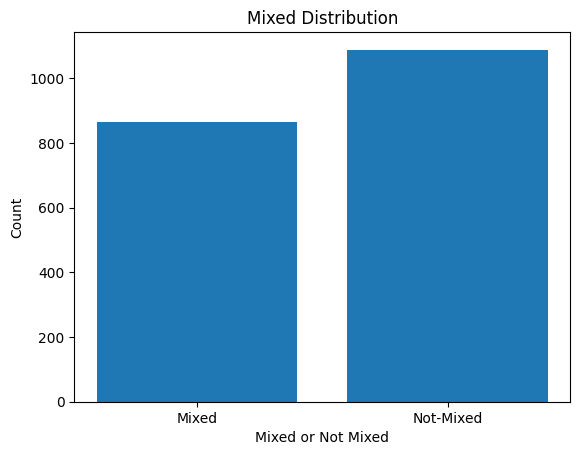

In [14]:
species_counts = animal_df['species'].value_counts()

plt.bar(species_counts.index, species_counts.values)
plt.xlabel('Mixed or Not Mixed')
plt.ylabel('Count')
plt.title('Mixed Distribution')

plt.xticks([1, 2], ['Mixed', 'Not-Mixed'])

plt.show()

# **Memo 값 전처리**

In [17]:
animal_df

,adoptionStatusCd,age,classification,gender,hitCnt,memo,species,weight
0,2,2.000000,1,2,152,"중성수 추정, 마름, 홍역음성, 파보음성, 코로나음성",2,3.20
1,2,4.000000,1,2,93,"치석, 겁많음, 홍역음성, 파보음성, 코로나음성",1,6.60
2,2,0.208333,1,2,92,"홍역음성, 파보음성, 코로나음성",1,2.60
6,2,8.000000,1,2,262,"목줄착용, 안구백탁, 치석, 홍역음성, 파보음성, 코로나음성",2,31.60
7,2,2.000000,1,1,136,"동시구조, 목줄착용, 치석약간, 겁많음, 마름, 홍역음성, 파보음성, 코로나음성",1,10.00
...,...,...,...,...,...,...,...,...
3259,2,1.000000,2,2,10064,"수컷(중성화수술 O추정), 교통사고추정, 후지파행-좌측 경골비골 완전골절, 우측후지...",2,3.70
3260,2,2.000000,2,1,2947,"중성암(TNR개체), 좌측귀잘림, 교통사고, 외부동물병원진료, 우안돌출-환납불가, ...",2,4.30
3261,2,0.500000,2,2,1138,"중성화 수(3/23), 교통사고, 기력저하, 심한탈수, 양안 제3안검돌출, 심하게 ...",2,1.89
3262,2,3.000000,2,1,1479,"중성 암(2/15), 교통사고, 후지파행, 경계심, 골반골절, 혈뇨, 심한구내염, ...",2,3.20


In [44]:
len(animal_df['memo'].unique())

1760

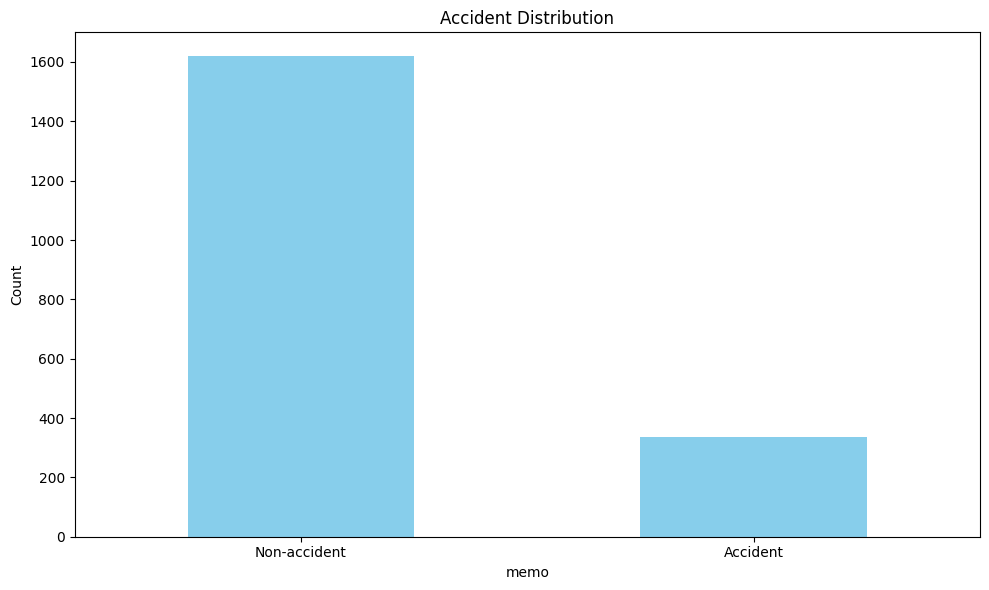

In [56]:
negatives = ['사고', '돌출', '골절', '불가', '잘림', '학대', '파행', '심한', '진료']

accident_flag = animal_df['memo'].apply(lambda x: 'Accident' if isinstance(x, str) and any(word in x for word in negatives) else 'Non-accident')

# 'memo' 열에 대해 교통사고 포함 여부 빈도 계산
accident_counts = accident_flag.value_counts()

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))
accident_counts.plot(kind='bar', color='skyblue')

# 그래프 꾸미기
plt.ylabel('Count')
plt.title('Accident Distribution')
plt.xticks(rotation=0)

# 그래프 출력
plt.tight_layout()  # 레이아웃 자동 조정
plt.show()

## Memo 열은 자연어 처리를 해야하기 때문에, 제외함.

In [57]:
animal_df = animal_df.drop(columns='memo')
animal_df

,adoptionStatusCd,age,classification,gender,hitCnt,species,weight
0,2,2.000000,1,2,152,2,3.20
1,2,4.000000,1,2,93,1,6.60
2,2,0.208333,1,2,92,1,2.60
6,2,8.000000,1,2,262,2,31.60
7,2,2.000000,1,1,136,1,10.00
...,...,...,...,...,...,...,...
3259,2,1.000000,2,2,10064,2,3.70
3260,2,2.000000,2,1,2947,2,4.30
3261,2,0.500000,2,2,1138,2,1.89
3262,2,3.000000,2,1,1479,2,3.20


# **전처리한 DataFrame 저장**

In [58]:
with open('/content/drive/MyDrive/dm_data/animal_df.pickle', 'wb') as file:
    pickle.dump(animal_df, file)